In [ ]:
import torch
from torchvision.transforms import ToTensor
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import nn
import torchvision
import json
from tqdm.auto import tqdm
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup path to data folder
data_path = Path("/content/drive/MyDrive/Colab Notebooks/OpenCV/KTP.v1i.coco-segmentation/")

In [ ]:
data_train_path = os.path.join(data_path, 'train')

with open(os.path.join(data_train_path, "_annotations.coco.json"), 'r') as file:
    data = file.read()
    print(file.read())

# Convert JSON data to a Python object
data = json.loads(data)

In [ ]:
id, license, file_name, height, width, date_captured = [], [], [], [], [], []
column_names = []


for item in data["images"]:
  for i,j in zip(item.keys(), item.values()):
    globals()[i].append(j)

data_images_train = pd.DataFrame(list(zip(id, license, file_name, height, width, date_captured)), columns =['id', 'license', 'file_name', 'height', 'width', 'date_captured'])
data_images_train

,id,license,file_name,height,width,date_captured
0,0,1,IMG-20230807-WA0011_jpg.rf.8f5821dc70cab235769...,640,640,2023-12-07T07:17:29+00:00
1,1,1,IMG-20221220-WA0058_jpg.rf.8f70d400cc532d5bbd9...,640,640,2023-12-07T07:17:29+00:00
2,2,1,IMG-20221219-WA0032_jpg.rf.943e01accf01671e93f...,640,640,2023-12-07T07:17:29+00:00
3,3,1,IMG-20230901-WA0048_jpg.rf.91692b996271b7a4a52...,640,640,2023-12-07T07:17:29+00:00
4,4,1,IMG-20230724-WA0030_jpg.rf.93f8f4900a6c4365bd5...,640,640,2023-12-07T07:17:29+00:00
...,...,...,...,...,...,...
370,370,1,IMG-20230902-WA0015_jpg.rf.820b0eda671a2c0a9b3...,640,640,2023-12-07T07:17:29+00:00
371,371,1,IMG-20221220-WA0001_jpg.rf.895c3d273954afd3db3...,640,640,2023-12-07T07:17:29+00:00
372,372,1,IMG-20230902-WA0081_jpg.rf.8af5316fecc5cc7a8e0...,640,640,2023-12-07T07:17:29+00:00
373,373,1,IMG-20230902-WA0087_jpg.rf.8c40b7b1a318ba9b1e8...,640,640,2023-12-07T07:17:29+00:00


In [ ]:
id, image_id, category_id, bbox, area, segmentation, iscrowd = [], [], [], [], [], [], []
column_names = []

for item in data["annotations"]:
  #for item_anno in item.values():
  for i,j in zip(item.keys(), item.values()):
    globals()[i].append(j)

data_annotation_train = pd.DataFrame(list(zip(id, image_id, category_id, bbox, area, segmentation, iscrowd)), columns =['id', 'image_id', 'category_id', 'bbox', 'area', 'segmentation', 'iscrowd'])
data_annotation_train

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[182, 44, 173.704, 416.076]",72274.133,"[[193.955, 455.588, 200.065, 460.244, 340.6, 4...",0
1,1,1,1,"[9, 20, 602.904, 615.071]",370828.649,"[[585.783, 634.676, 604.091, 628.555, 609.141,...",0
2,2,2,1,"[25, 1, 614.289, 639.179]",392640.652,"[[599.949, 640, 638.813, 0.821, 48.855, 0.821,...",0
3,3,3,1,"[151, 111, 422.946, 355.072]",150176.628,"[[153.978, 122.989, 151.453, 136.576, 156.503,...",0
4,4,4,1,"[29, 224, 573.723, 203.936]",117002.527,"[[44.524, 427.871, 585.172, 427.513, 595.985, ...",0
...,...,...,...,...,...,...,...
370,370,370,1,"[277, 1, 203.125, 559.722]",113693.576,"[[289.141, 482.5, 296.172, 497.778, 298.516, 5...",0
371,371,371,1,"[7, 1, 618.185, 629.737]",389293.894,"[[34.61, 628.194, 44.284, 630.55, 53.958, 630....",0
372,372,372,1,"[1, 27, 638.063, 598.794]",382068.771,"[[3.175, 623.028, 26.032, 625.629, 615.873, 59...",0
373,373,373,1,"[42, 110, 535.01, 191.981]",102711.918,"[[91.069, 273.066, 105.325, 275.425, 116.226, ...",0


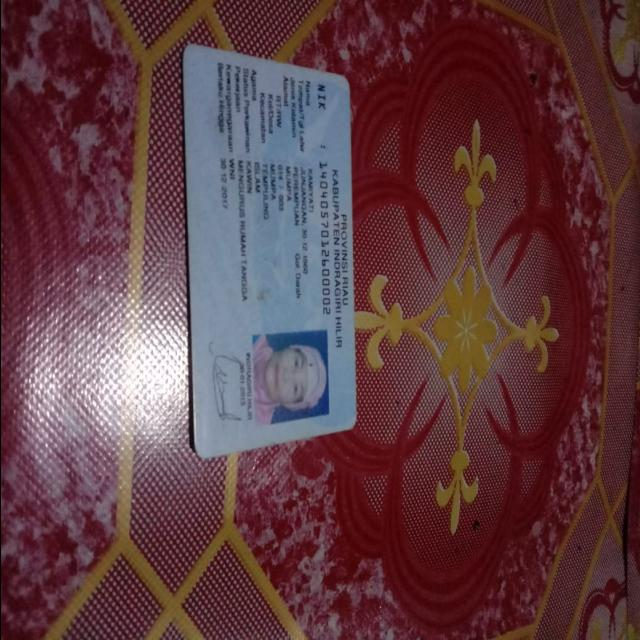

-1

In [ ]:
file_name_id0 = data_images_train.iloc[0]
file_name_id0 = file_name_id0['file_name']

file_name_id0
image = cv2.imread((os.path.join(data_train_path, file_name_id0)), cv2.COLOR_BGR2RGB)
cv2_imshow(image)
cv2.waitKey(0)

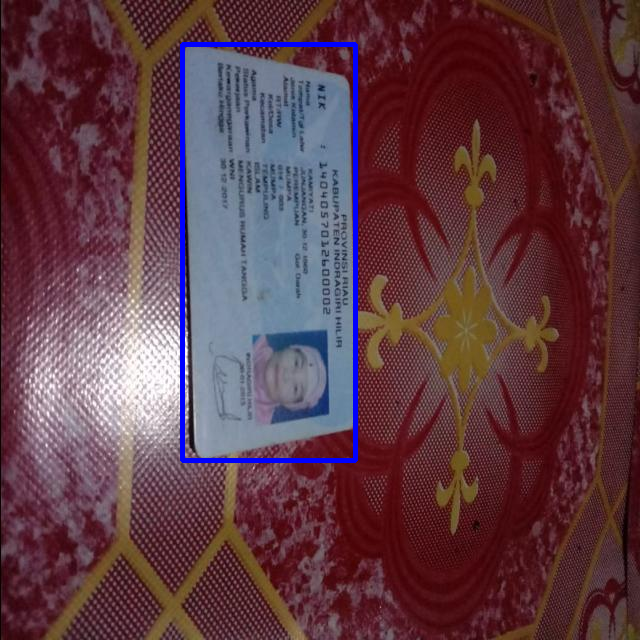

In [ ]:
data_annotation_sample = data_annotation_train.iloc[0]
data_annotation_sample_bbox = data_annotation_sample['bbox']

isClosed = True

# Green color in BGR
color = (0, 255, 0)

# Line thickness of 8 px
thickness = 8

x = 182
y = 44
w = 173
h = 416

image = cv2.rectangle(image, (x, y), (x + w, y + h), (255,0,0), 4)
cv2_imshow(image)

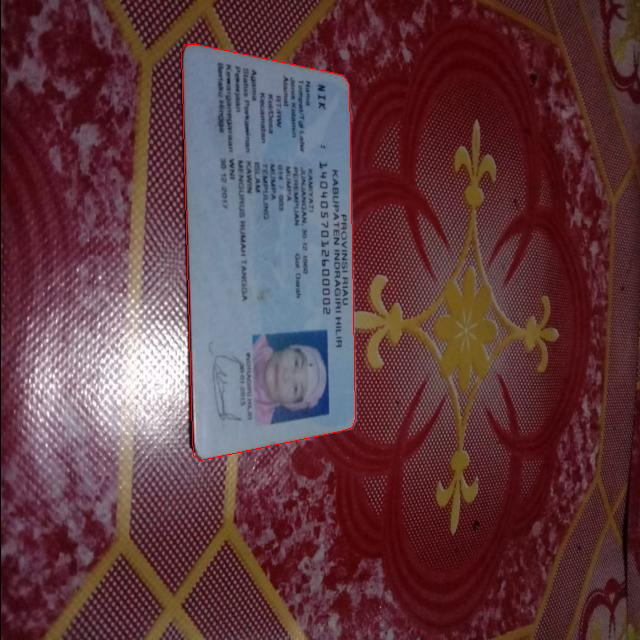

In [ ]:
from PIL import Image, ImageDraw

data_annotation_sample = data_annotation_train.iloc[0]
data_annotation_sample_segmentation = data_annotation_sample['segmentation']


image = Image.open((os.path.join(data_train_path, file_name_id0)))

# Create a drawing context
draw = ImageDraw.Draw(image)

# get the segmentation
segmentation = data_annotation_sample_segmentation[0]

# convert the list of points into pairs of tuple
pair_of_tuples = [(segmentation[i], segmentation[i+1]) for i in range(0, len(segmentation), 2)]

# draw the segmention
draw.polygon(pair_of_tuples, outline='red')

image

In [ ]:
data_annotation_sample_segmentation

[[193.955,
  455.588,
  200.065,
  460.244,
  340.6,
  431.729,
  352.821,
  427.074,
  355.439,
  418.927,
  349.329,
  84.321,
  343.219,
  75.592,
  336.236,
  73.846,
  197.01,
  44.168,
  185.663,
  44.168,
  181.735,
  51.733,
  192.646,
  438.712,
  193.955,
  455.588]]

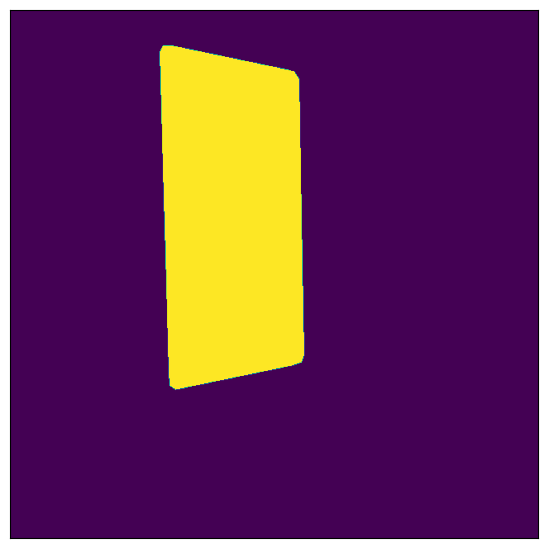

In [ ]:
image_height, image_width = image.size
masks_array = np.zeros((image_width, image_height))

image_ = Image.fromarray(masks_array)

# Create a drawing context
draw = ImageDraw.Draw(image_)

# get the segmentation
segmentation = data_annotation_sample_segmentation[0]

# convert the list of points into pairs of tuple
pair_of_tuples = [(segmentation[i], segmentation[i+1]) for i in range(0, len(segmentation), 2)]

# draw the segmention
draw.polygon(pair_of_tuples, outline=1, fill=1)

image_array = np.array(image_)

object_ids = np.unique(image_array)[1:]  # Remove index for background
mask_arrays = image_array == object_ids[:, None, None]

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 15))

tensorToPIL = torchvision.transforms.ToPILImage()
masks_tensor = torch.as_tensor(mask_arrays, dtype=torch.uint8)

ax1 = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
#ax1.set_title('Segentation Mask' + obj_label)
mask = tensorToPIL(masks_tensor)
plt.imshow(mask)


In [ ]:
masks_tensor

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [ ]:
from torchvision.ops import box_convert

In [ ]:
class ImportDataset(torch.utils.data.Dataset):

  def __init__(self, data_path, mode, transforms):
    self.data_path = Path(data_path)
    self.mode = mode
    self.transforms = transforms

    dataset_file = os.path.join(self.data_path, str(self.mode).lower())

    with open(os.path.join(dataset_file, "_annotations.coco.json"), 'r') as file:
        data = file.read()
        print(file.read())

    # Convert JSON data to a Python object
    data = json.loads(data)

    #self.id = dict()
    self.file_name = dict()
    self.len_data = []

    for item in data["images"]:
      self.file_name[item['id']] = item['file_name']
      self.len_data.append(item['id'])

    self.annotation = dict()

    for anno in data["annotations"]:
      self.annotation[anno['image_id']] = anno


  def __getitem__(self, index):
    data_image = self.file_name[index]
    data_image_path = os.path.join(self.data_path, str(self.mode).lower(), data_image)

    image = Image.open(data_image_path)

    convert_tensor = transforms.ToTensor()
    image_tensor = convert_tensor(image)

    #annotation = self.annotation
    annotation_image = self.annotation[index]

    #masks
    image_height, image_width = image.size
    masks_array = np.zeros((image_width, image_height))

    image_ = Image.fromarray(masks_array)

    # Create a drawing context
    draw = ImageDraw.Draw(image_)

    # get the segmentation
    segmentation = annotation_image['segmentation'][0]

    # convert the list of points into pairs of tuple
    pair_of_tuples = [(segmentation[i], segmentation[i+1]) for i in range(0, len(segmentation), 2)]

    # draw the segmention
    draw.polygon(pair_of_tuples, outline=1, fill=1)

    image_array = np.array(image_)

    object_ids = np.unique(image_array)[1:]  # Remove index for background
    mask_arrays = image_array == object_ids[:, None, None]

    #boxes = torch.Tensor([annotation_image['bbox']])
    boxes = torch.as_tensor([annotation_image['bbox']], dtype=torch.float32)
    labels = torch.as_tensor([annotation_image['category_id']])
    #image_id = torch.from_numpy(np.array(annotation_image['image_id']))
    #image_id = torch.tensor([int(annotation_image['image_id'])])
    image_id = int(index)#torch.as_tensor([index])
    area = torch.as_tensor([int(annotation_image['area'])])
    iscrowd = torch.as_tensor([annotation_image['iscrowd']])
    #masks = torch.Tensor([[annotation_image['segmentation']]])
    masks = torch.as_tensor(mask_arrays, dtype=torch.uint8)

    annotation_image = dict()
    annotation_image['boxes'] = box_convert(boxes, 'xywh', 'xyxy')
    annotation_image['labels'] = labels
    annotation_image['image_id'] = image_id
    annotation_image['area'] = area
    annotation_image['iscrowd'] = iscrowd
    annotation_image['masks'] = masks

    if self.transforms is not None:
            image_tensor, annotation_image = self.transforms(image_tensor, annotation_image)


    return image_tensor, annotation_image

  def __len__(self):
        return len(self.len_data)


In [ ]:
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

In [ ]:
dataset_train = ImportDataset(data_path = "/content/drive/MyDrive/Colab Notebooks/OpenCV/KTP.v1i.coco-segmentation/", mode = "train", transforms = get_transform(train=True))
dataset_valid = ImportDataset(data_path = "/content/drive/MyDrive/Colab Notebooks/OpenCV/KTP.v1i.coco-segmentation/", mode = "valid", transforms = get_transform(train=False))
dataset_test = ImportDataset(data_path = "/content/drive/MyDrive/Colab Notebooks/OpenCV/KTP.v1i.coco-segmentation/", mode = "test", transforms = get_transform(train=False))

In [ ]:
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py")
os.system("wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py")
os.system("wget https://github.com/pytorch/vision/blob/a98e17e50146529cdfadb590ba063e6bbee71de2/torchvision/ops/boxes.py")

0

In [ ]:
import utils

# data loader for training
detection_train_loader = torch.utils.data.DataLoader(
    dataset_train, batch_size=6, shuffle=True, num_workers=4, collate_fn=utils.collate_fn)

# data loader for validation
detection_valid_loader = torch.utils.data.DataLoader(
    dataset_valid, batch_size=2, shuffle=False, num_workers=2, collate_fn=utils.collate_fn)

# data loader for testing
detection_test_loader = torch.utils.data.DataLoader(
    dataset_test, batch_size=2, shuffle=False, num_workers=0, collate_fn=utils.collate_fn)

# defining orientation data loaders dictionary
detection_loaders = {
    'train' : detection_train_loader,
    'valid' : detection_valid_loader,
    'test' : detection_test_loader,
}

In [ ]:
train_features, train_labels = next(iter(detection_train_loader))
train_labels[0]

{'boxes': tensor([[ 28.0000,  29.0000, 639.5000, 598.9370]]),
 'labels': tensor([1]),
 'image_id': 221,
 'area': tensor([348516]),
 'iscrowd': tensor([0]),
 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)}

In [ ]:
test_features, test_labels = next(iter(detection_test_loader))
a = test_labels[0]['masks']
b = torch.squeeze(a, 0)
c = torch.squeeze(b, 0)
c[0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
import sys
# Append the directory to your python path using sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/OpenCV/pytorch-for-information-extraction-master')
# Import the module
import engine

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor


def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained on COCO
    model = torchvision.models.detection.maskrcnn_resnet50_fpn(weights="DEFAULT")

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    # now get the number of input features for the mask classifier
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
    hidden_layer = 256
    # and replace the mask predictor with a new one
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
        in_features_mask,
        hidden_layer,
        num_classes
    )

    return model

In [ ]:
num__classes = 2

In [ ]:
from engine import train_one_epoch, evaluate
#from torch.nn import cross_entropy_loss

# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


# get the model using our helper function
model = get_model_instance_segmentation(num_classes = 2)

# move model to the right device
#model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 183MB/s]


In [ ]:
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, detection_train_loader, None, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, detection_test_loader, None)

print("That's it!")

Epoch: [0]  [ 0/63]  eta: 1:19:02  lr: 0.000086  loss: 5.7496 (5.7496)  loss_classifier: 0.5500 (0.5500)  loss_box_reg: 0.1148 (0.1148)  loss_mask: 5.0681 (5.0681)  loss_objectness: 0.0057 (0.0057)  loss_rpn_box_reg: 0.0109 (0.0109)  time: 75.2810  data: 3.3111  max mem: 0
Epoch: [0]  [10/63]  eta: 1:00:04  lr: 0.000891  loss: 1.1548 (2.1435)  loss_classifier: 0.2814 (0.3147)  loss_box_reg: 0.1058 (0.1077)  loss_mask: 0.9522 (1.7025)  loss_objectness: 0.0059 (0.0070)  loss_rpn_box_reg: 0.0114 (0.0116)  time: 68.0137  data: 0.3085  max mem: 0
Epoch: [0]  [20/63]  eta: 0:48:15  lr: 0.001697  loss: 0.8502 (1.4219)  loss_classifier: 0.0802 (0.1972)  loss_box_reg: 0.1036 (0.1017)  loss_mask: 0.5734 (1.1006)  loss_objectness: 0.0090 (0.0113)  loss_rpn_box_reg: 0.0106 (0.0112)  time: 66.9293  data: 0.0107  max mem: 0
Epoch: [0]  [30/63]  eta: 0:36:53  lr: 0.002502  loss: 0.4325 (1.0970)  loss_classifier: 0.0512 (0.1468)  loss_box_reg: 0.0918 (0.0977)  loss_mask: 0.2850 (0.8311)  loss_objectne

In [ ]:
from pathlib import Path

data_path = Path("/content/drive/MyDrive/Colab Notebooks/OpenCV/KTP-Detection")

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("/content/drive/MyDrive/Colab Notebooks/OpenCV/KTP-Detection")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "KTP-Detection.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: /content/drive/MyDrive/Colab Notebooks/OpenCV/KTP-Detection/KTP-Detection.pth


In [ ]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model = get_model_instance_segmentation(2)

# # Update the classifier head
# loaded_model.classifier = nn.Sequential(
#     nn.Dropout(p=0.3, inplace=True), # keep dropout layer same
#     nn.Linear(in_features=1280, # keep in_features same
#               out_features=2)) # change out_features to suit our number of classes

# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model = loaded_model.to(device)

In [ ]:
dataset_test[0][0]

tensor([[[0.7843, 0.7843, 0.7922,  ..., 0.7804, 0.7765, 0.7765],
         [0.7804, 0.7843, 0.7882,  ..., 0.7804, 0.7765, 0.7765],
         [0.7804, 0.7843, 0.7882,  ..., 0.7804, 0.7765, 0.7765],
         ...,
         [0.6039, 0.6078, 0.6196,  ..., 0.6314, 0.6314, 0.6275],
         [0.6039, 0.6118, 0.6196,  ..., 0.6314, 0.6314, 0.6275],
         [0.6039, 0.6118, 0.6196,  ..., 0.6314, 0.6314, 0.6275]],

        [[0.7490, 0.7490, 0.7569,  ..., 0.7373, 0.7333, 0.7333],
         [0.7451, 0.7490, 0.7529,  ..., 0.7373, 0.7333, 0.7333],
         [0.7451, 0.7490, 0.7529,  ..., 0.7373, 0.7333, 0.7333],
         ...,
         [0.5686, 0.5725, 0.5843,  ..., 0.5804, 0.5804, 0.5765],
         [0.5686, 0.5765, 0.5843,  ..., 0.5804, 0.5804, 0.5765],
         [0.5686, 0.5765, 0.5843,  ..., 0.5804, 0.5804, 0.5765]],

        [[0.6824, 0.6824, 0.6902,  ..., 0.6667, 0.6627, 0.6627],
         [0.6784, 0.6824, 0.6863,  ..., 0.6667, 0.6627, 0.6627],
         [0.6784, 0.6824, 0.6863,  ..., 0.6667, 0.6627, 0.

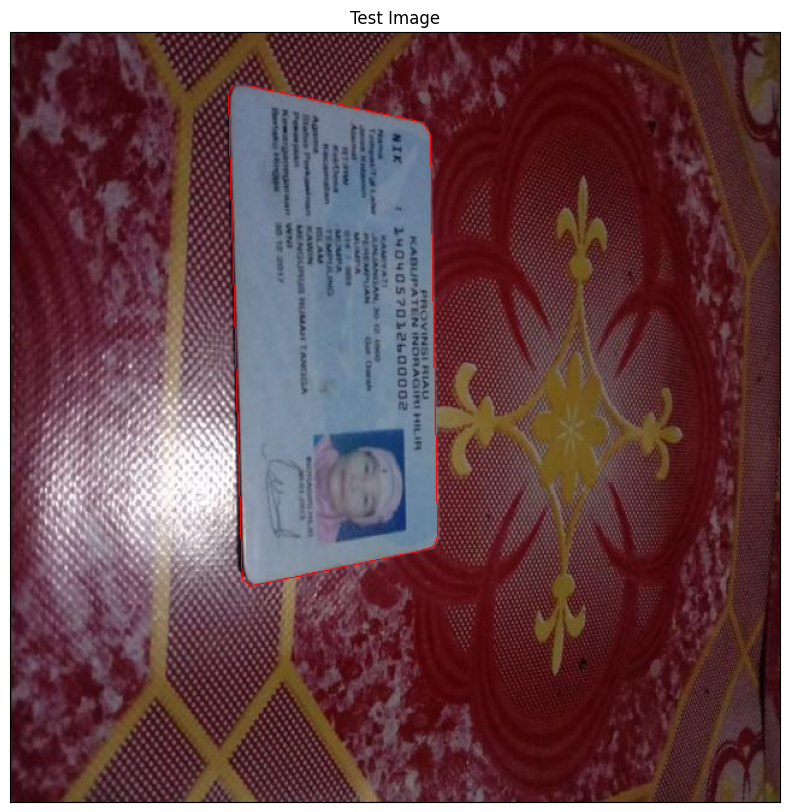

In [ ]:
image_tensor = dataset_test[0][0]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.set_title('Test Image')
plt.imshow(image)

# put the model in evaluation mode
loaded_model.eval()
with torch.no_grad():
    # forward pass the test image to get detection predictions
    detection_predictions = loaded_model(image_tensor.unsqueeze(0).to(device))

In [ ]:
print(detection_predictions[0]['labels'].size()[0], 'objects detected !')
detection_predictions[0]

1 objects detected !


{'boxes': tensor([[  7.8146,  14.6018, 620.4282, 586.0382]], device='cuda:0'),
 'labels': tensor([1], device='cuda:0'),
 'scores': tensor([0.9974], device='cuda:0'),
 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0')}